# Picking arrival times in seismic stack 
S. Nielsen 2020

## Initialisation cells

In [1]:
import matplotlib
import os
import subprocess
import ipympl
from ipywidgets import Button, HBox, VBox, widgets
%matplotlib ipympl
%run Init_Picking_3.4

In [2]:
lin_0, col_1, col_2, fpath, dat_file, shot_pos, geo_dx, moved_geo, new_pos, dummy  = box_widget()
VBox([lin_0, HBox([col_1, col_2])])

In [5]:
path = fpath.value; in_file = dat_file.value; shot_x = float(shot_pos.value); dx = float(geo_dx.value); 
dat1=oread(path+in_file)
dat2=np.transpose(np.array(dat1))
npts, ntraces = dat2.shape
dt=1.0/dat1[0].stats.sampling_rate
dx = float(geo_dx.value)
date=str(dat1[0].stats.starttime)[0:9];
flag=True
try:
    mog = [int(moved_geo.value), float(new_pos.value)]
except ValueError:
    mog = [-1,-1]
gpos=[]
for i in range(ntraces):
    if i+1 == mog[0]: 
        gpos.append(mog[1])
    else:
        gpos.append(dx*float(i))

# Picking graphic window
### !! use redvel=0.0 for picking !!
redvel is reduced velocity, to check horizon velocity replace with value in m/s. but use redvel=0.0 for picking (bypass reduction)<br>
Pick with **right-click** of mouse. A red circle appears for each picked trace.<br>
Use pan and zoom in/out if necessary (tools at bottom of figure)<br>
AGC is length of Automatic Gain Control window, use 0.0 to avoid AGC. <br> 
Scale amplifies each trace --redefine if needed<br> 
You can skip picking for some of the traces (e.g, poor or no signal), and do them in any order <br>
Can't undo single pick yet, sorry --to correct replot and then redo all picks
## Select file, define dx (geophone spacing), pick, save, ...REPEAT:

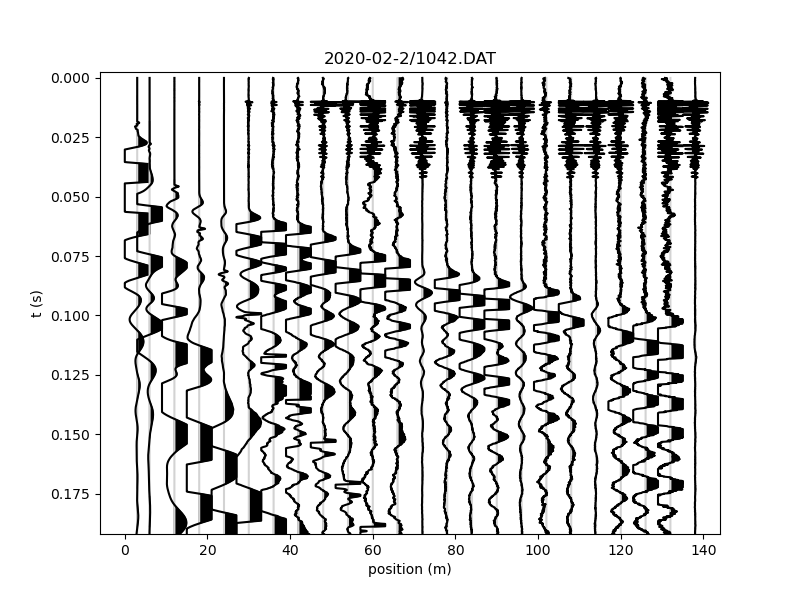

In [6]:
# graphic interactive window
pos=[]
fig,ax=plt.subplots(figsize=(8,6))
wiggle_plot(dat2, gpos, dx, dt, normalize=True, scale=3, AGC=0.0, redvel=0.0, clip=True)
ax.set_title(date+'/'+in_file)
cid=fig.canvas.mpl_connect('button_press_event', lambda event: onclick(event,pos))

### save picking to output file. Ouput filename automatically set based on input file name.

In [7]:
# quantize position to nearest geophone:
apos=np.asarray(pos);cpos=[]
for val in apos:
    idx = (np.abs(gpos - val[0])).argmin()
    xx = gpos[idx]
    cpos.append([xx,val[1]])
cpos=sorted(cpos, key=lambda x: x[0])
cpos=np.asarray(cpos)

df=pd.DataFrame(cpos);
# save to file --output name same as input but with "artimes_" in front and ".csv" extension.
out_file=path+"artimesB_"+in_file[:-4]+".csv"
f = open(out_file,'w')
first_line=' '.join([str(shot_x),' = shot_pos.',
                     'Moved_geo:',moved_geo.value,'to new position:',new_pos.value,'\n'])
f.write(first_line)
df.to_csv(f,header=None,index=None)
f.close()
# save picking graphic
fig.savefig(path+"artimes_"+in_file[:-4]+".pdf")

# END

In [15]:
out_file

'./ExampleData/artimesB_1042.csv'